In [1]:
# Importing libs
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [4]:
# iris data load
import pandas as pd
url = 'Iris.csv'
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# preprocess data, delete unnecessary columns
df = df.drop(['SepalWidthCm', 'PetalWidthCm'], axis=1)

In [6]:
# Convert target labels to numerical values
Y = []
target = df['Species']
for val in target:
    if val == 'Iris-setosa':
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'], axis=1)
X = df.values.tolist()

In [7]:
# Shuffle, split data into training and test sets
X, Y = shuffle(X, Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

In [8]:
# SVM using scikit learn
# !pip install scikit-learn
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

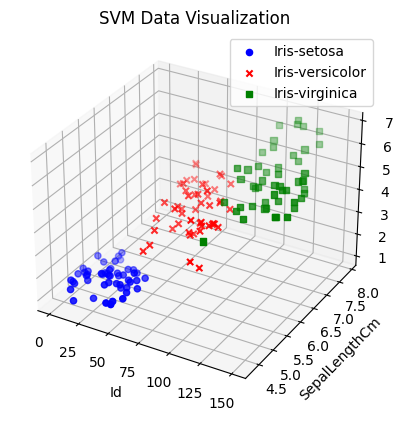

In [9]:
# 3d Visualization three features on species
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

feature1 = df.columns[0]
feature2 = df.columns[1]
feature3 = df.columns[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Iris-setosa'
ax.scatter(df[feature1][np.array(target) == 'Iris-setosa'],
           df[feature2][np.array(target) == 'Iris-setosa'],
           df[feature3][np.array(target) == 'Iris-setosa'],
           c='b', marker='o', label='Iris-setosa')

# Scatter plot for 'Iris-versicolor'
ax.scatter(df[feature1][np.array(target) == 'Iris-versicolor'],
           df[feature2][np.array(target) == 'Iris-versicolor'],
           df[feature3][np.array(target) == 'Iris-versicolor'],
           c='r', marker='x', label='Iris-versicolor')

# Scatter plot for 'Iris-virginica'
ax.scatter(df[feature1][np.array(target) == 'Iris-virginica'],
           df[feature2][np.array(target) == 'Iris-virginica'],
           df[feature3][np.array(target) == 'Iris-virginica'],
           c='g', marker='s', label='Iris-virginica')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
plt.legend()
plt.title('SVM Data Visualization')
plt.show()

In [10]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model:", accuracy)

Accuracy of the SVM model: 1.0
